## Problem Statement: Identifying the Optimal Electric Vehicle (EV) Segment for a New Startup in the Indian Market
    
Introduction:

The electric vehicle (EV) market is experiencing rapid growth globally, but competition is fierce. To ensure success, our newly established EV startup needs to identify a specific vehicle segment with high potential for early adoption and long-term profitability in Indian market.

Objective:

Develop a market entry strategy by conducting a comprehensive historical data and segmentation analysis of the EV market in India. This analysis will identify the most promising segment for our initial EV offering.

About Data:
    
    The data used for analysis is the historical data of EV vechicles in the Indian market from 2016-2023.

It contains the following features:

    region:India
    category: Historical
    parameter: 'EV sales share', 'EV stock share', 'EV sales', 'EV stock',
       'Oil displacement Mbd', 'Oil displacement, million lge',
       'Electricity demand', 'EV charging points'
    mode:'Vans', 'Cars', 'Buses', 'EV', 'Trucks'
    powertrain: 'EV', 'BEV', 'PHEV', 'FCEV', 'Publicly available fast',
       'Publicly available slow'
    year: 2016-2023
    unit: Depends on paramter unit like 'percent', 'Vehicles', 'Milion barrels per day',
       'Oil displacement, million lge', 'GWh', 'charging points'
    value: Numerical value of parameter in the above units.
    
    Column Description:
    
    powetrain:
        BEVs are battery electric vehicles. 
        PHEVs are plug-in hybrid electric vehicles. 
        FCEVs are fuel cell electric vehicles. 
        EVs refers to all electric vehicles (BEVs + PHEVs).
        
    parameter:
        Sales and Stock:

        EV Sales: This refers to the number of new electric vehicles sold within a specific timeframe, typically a month, quarter, or year. It's a key metric for gauging the growth and adoption rate of EVs in the market.

        EV Stock: This represents the total number of electric vehicles currently in operation within a particular region or globally. It considers all previously sold EVs that haven't been scrapped or permanently removed from use.

        Market Share:

        EV Sales Share: This metric indicates the percentage of total vehicle sales that are attributed to electric vehicles within a specific timeframe. It helps understand the penetration level of EVs compared to gasoline-powered vehicles.

        EV Stock Share: This reflects the portion of all vehicles in operation that are electric vehicles, expressed as a percentage. It provides insights into the long-term trend of EV adoption and the gradual shift toward electrification.

        Oil Displacement:

        Oil Displacement Mbd (Million barrels per day): This metric estimates the volume of oil that is no longer needed due to the increased adoption of EVs. It highlights the potential impact of EVs on reducing dependence on fossil fuels and greenhouse gas emissions.

        Oil Displacement, million lge (million liters gasoline equivalent): Similar to Mbd, this metric expresses the volume of gasoline that is displaced by EVs, again emphasizing the environmental benefits of electric transportation.

        Electricity Demand:

        Electricity Demand: This refers to the amount of electricity needed to power the growing fleet of EVs. As more EVs are adopted, the demand for electricity is expected to rise, requiring grid upgrades and investments in renewable energy sources to meet this demand sustainably.

        Charging Infrastructure:

        EV Charging Points: This refers to the number of locations where EVs can be plugged in to recharge their batteries. This includes public charging stations, private charging points at homes or workplaces, and fast-charging stations for rapid recharging. The availability and accessibility of charging infrastructure are crucial factors influencing EV adoption.
        
External link :
     https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster

# for k-means analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# for supressing warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Importing and Exploring the Data Set

In [2]:
df = pd.read_csv('EV_data_latest_till_2023.csv')

In [3]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,India,Historical,EV sales share,Vans,EV,2016,percent,0.056000
1,India,Historical,EV stock share,Vans,EV,2016,percent,0.003200
2,India,Historical,EV sales,Vans,BEV,2016,Vehicles,180.000000
3,India,Historical,EV stock,Vans,BEV,2016,Vehicles,180.000000
4,India,Historical,Oil displacement Mbd,Vans,EV,2016,Milion barrels per day,0.000009
...,...,...,...,...,...,...,...,...
223,India,Historical,EV charging points,EV,Publicly available fast,2022,charging points,4100.000000
224,India,Historical,EV charging points,EV,Publicly available slow,2022,charging points,6800.000000
225,India,Historical,Oil displacement Mbd,Trucks,EV,2022,Milion barrels per day,0.000001
226,India,Historical,"Oil displacement, million lge",Trucks,EV,2022,"Oil displacement, million lge",0.064000


Insight:
    
    The data contains 228 rows and 8 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      228 non-null    object 
 1   category    228 non-null    object 
 2   parameter   228 non-null    object 
 3   mode        228 non-null    object 
 4   powertrain  228 non-null    object 
 5   year        228 non-null    int64  
 6   unit        228 non-null    object 
 7   value       228 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 14.4+ KB


Insights:
    
    The features parameter, mode, powertrain, unit are of 'Object' type.
    year and value are 'numerical' type.
    There are no null values in the data.

In [5]:
#dropping the columns region and category as they are not required for our analysis
df.drop(['region','category'],axis=1,inplace=True)

In [6]:
list(df.columns)

['parameter', 'mode', 'powertrain', 'year', 'unit', 'value']

In [7]:
df.shape

(228, 6)

In [8]:
df.dtypes

parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [9]:
df.isnull().sum()

parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

### Univariate Analysis

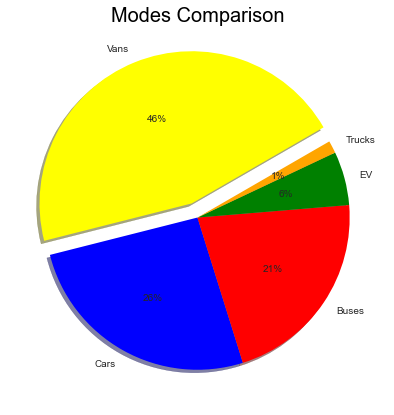

In [10]:
plt.figure(figsize=(12,7))
plt.pie(df['mode'].value_counts(), labels= df['mode'].unique(), 
        colors=['yellow','blue','red','green','orange'], autopct='%.0f%%', explode = [0.1, 0,0,0,0], shadow = True, startangle=30)
plt.title('Modes Comparison',fontsize=20, color = 'Black')
plt.show()

Insight:
    
    This data contains 46% information about vans , 26% about cars, 21% buses , 6% EV and 1% trucks.

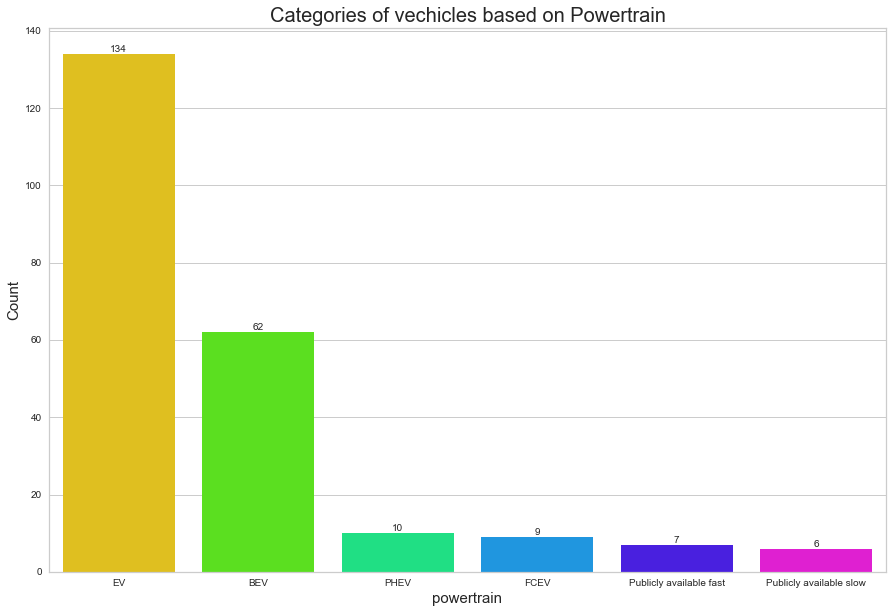

In [11]:
plt.figure(figsize=(15,10))
f = sns.countplot(x=df['powertrain'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.xlabel('powertrain',fontsize='15')
plt.ylabel('Count',fontsize='15')
plt.title('Categories of vechicles based on Powertrain', fontsize='20')
plt.show()

Insights:
    
    From the above plot it is known that BEVs dominate the other categories in the Indian market.

### Multi-Variate Analysis

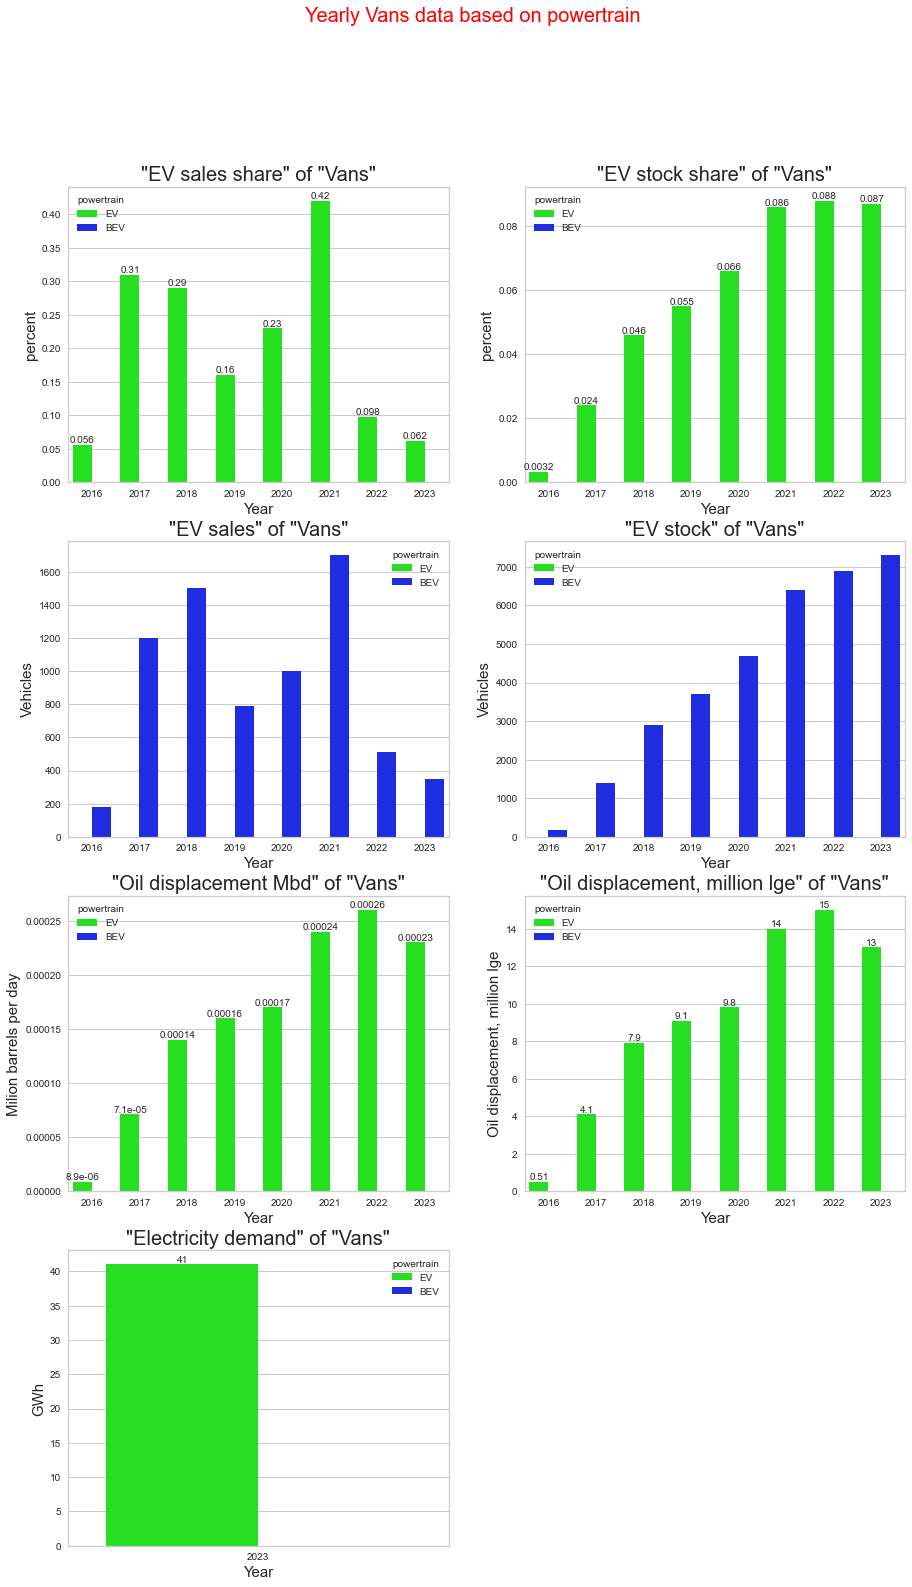

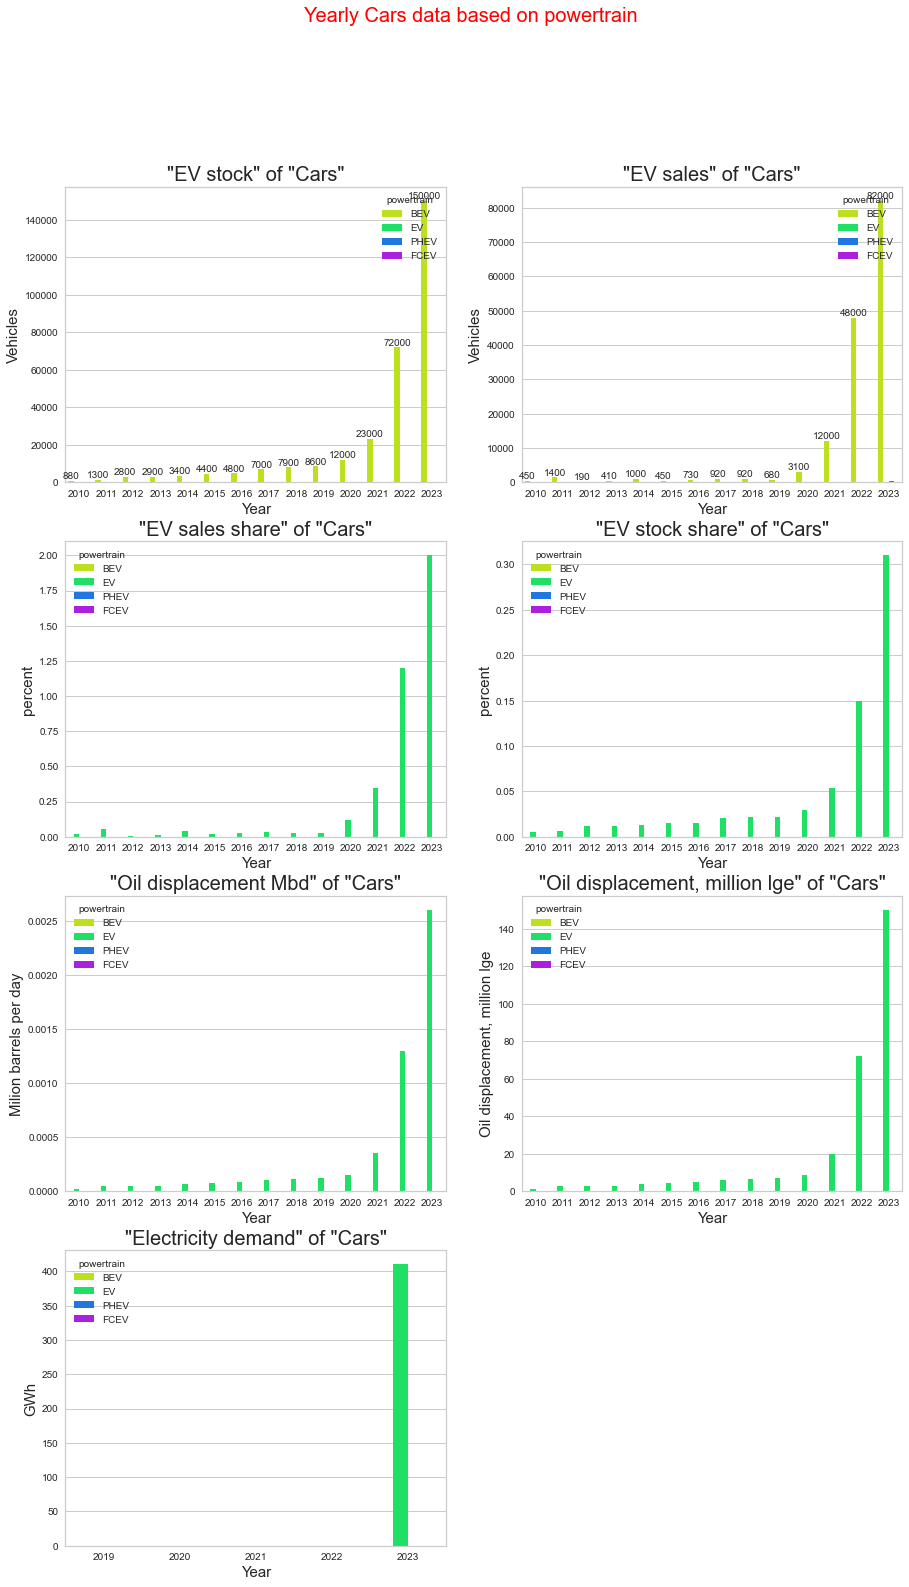

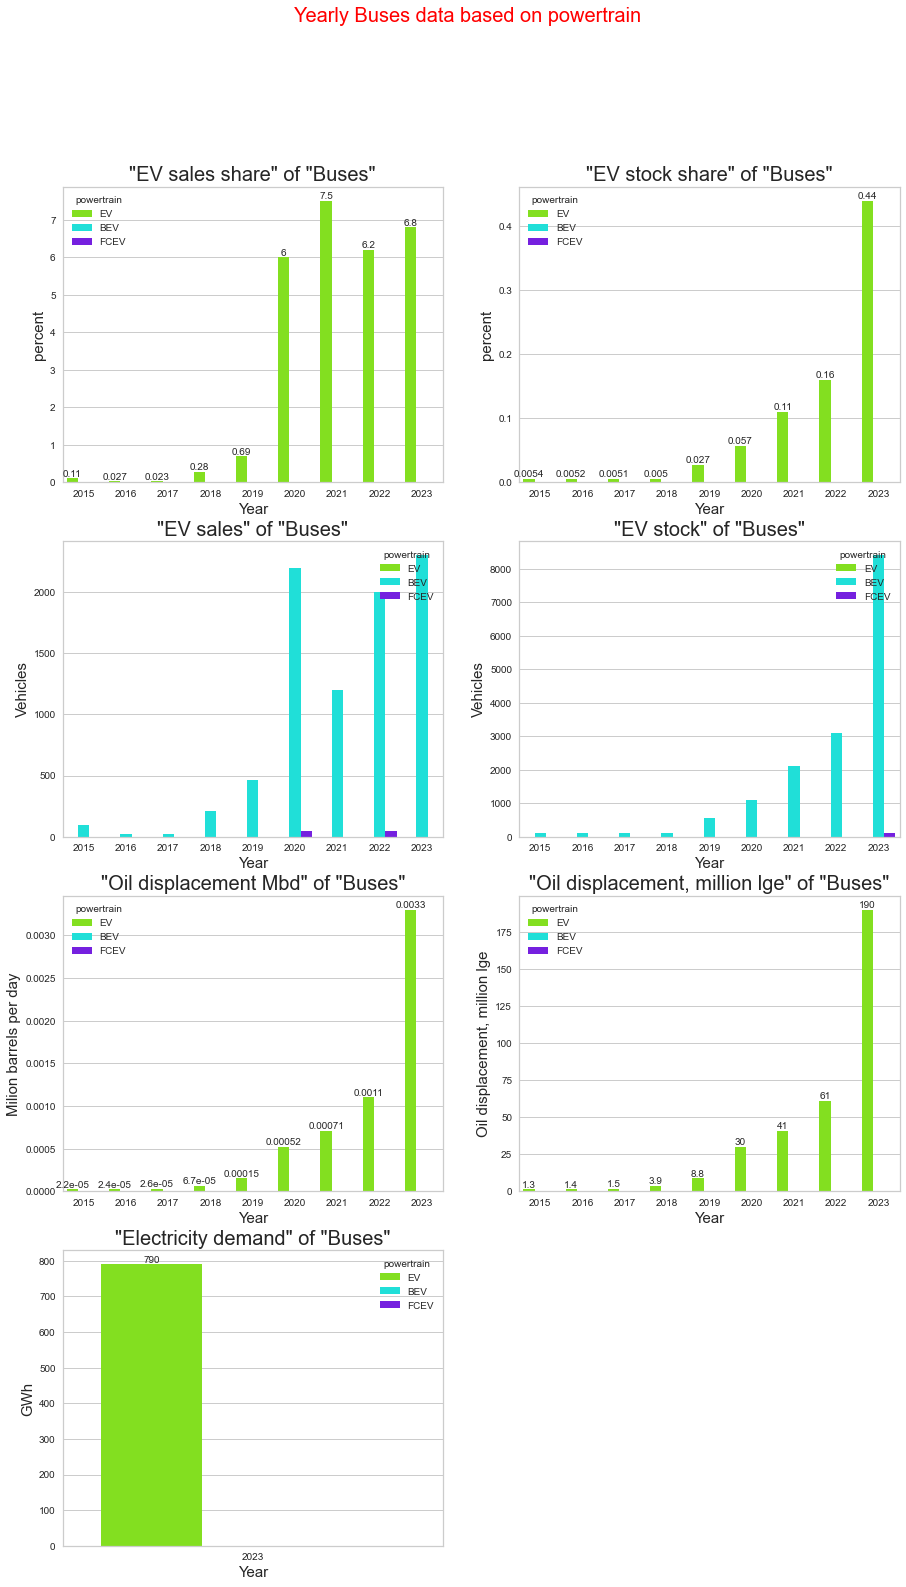

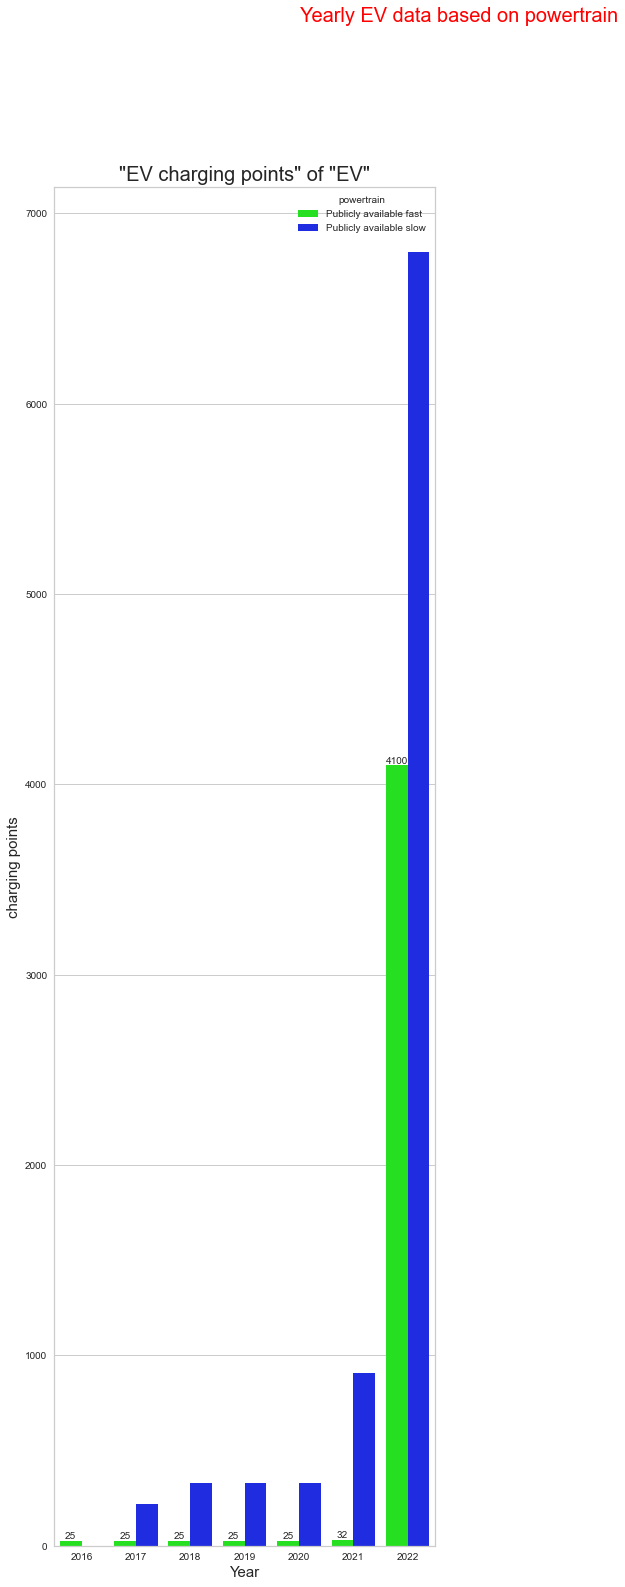

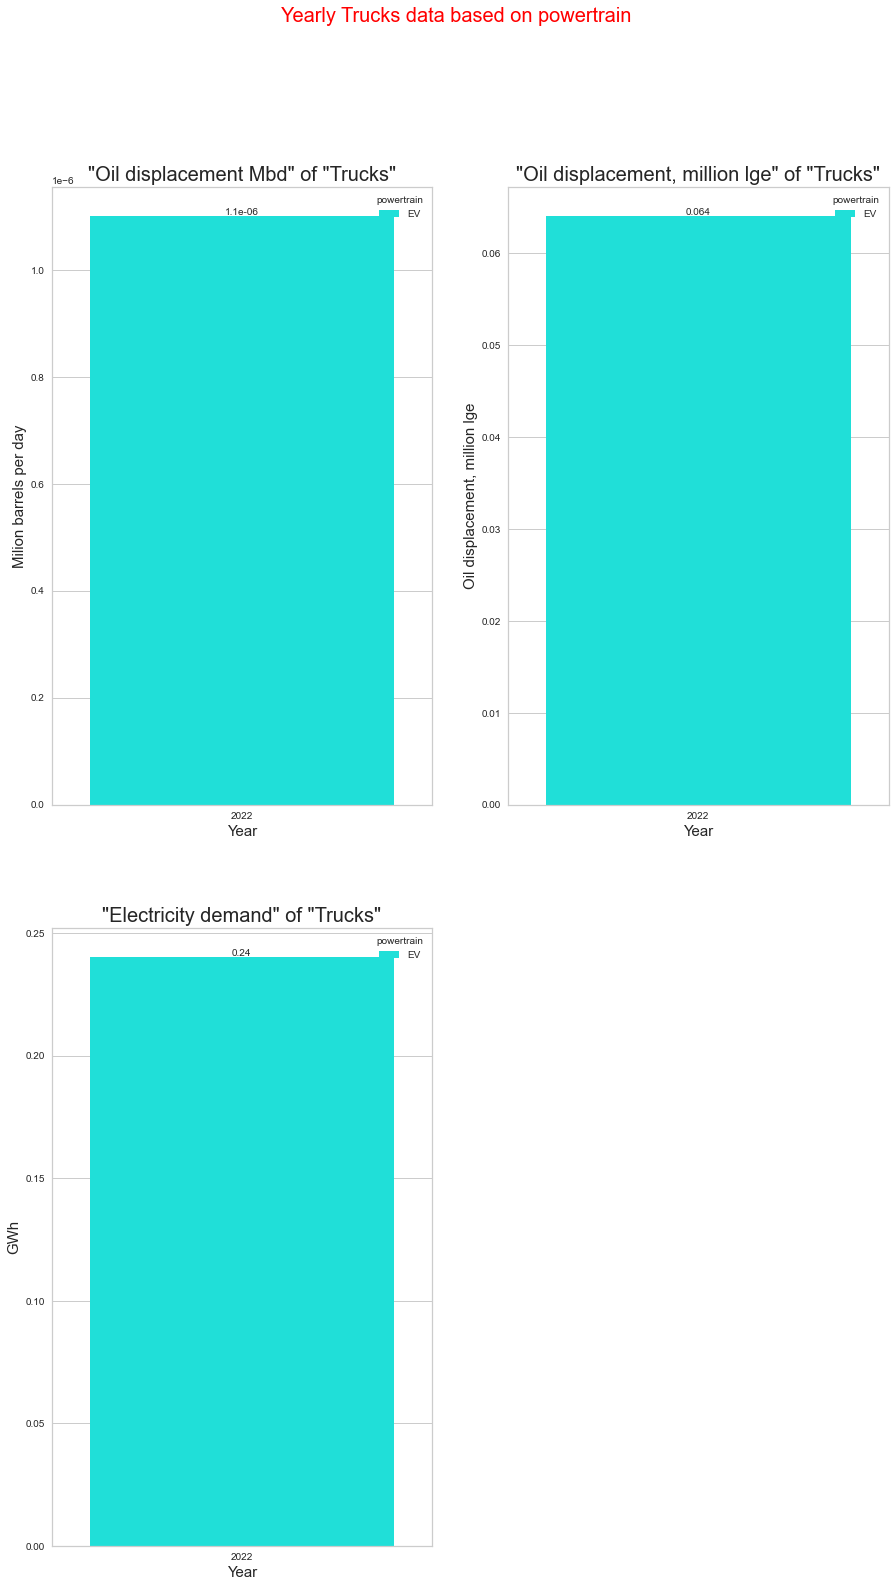

In [12]:
for mode in df['mode'].unique():
    dt = df[df['mode']==mode]
    
    plt.figure(figsize=(15,25))
    
    for i,par in enumerate(dt['parameter'].unique()): 
        unit = dt[dt['parameter']== par]['unit'].unique()[0]
       
        plt.subplot(int(len(dt['parameter'].unique())/2)+1, 2, i+1)    
        
        f = sns.barplot(x=dt[dt['parameter']== par]['year'], 
                        y = dt[dt['parameter']== par]['value'] ,
                        hue=dt['powertrain'],estimator=sum, ci=None, palette = 'hsv')
        f.bar_label(f.containers[0])
        plt.xlabel('Year',fontsize='15')
        plt.ylabel(f'{unit}',fontsize='15')
        plt.title(f'"{par}" of "{mode}"', fontsize='20')
    plt.suptitle(f"Yearly {mode} data based on powertrain", fontsize='20',color='red')
    plt.show()

Insights:

    Vans:
    
    'EV sales share' of Vans in the year peaked in 2021 with 42% which says out of all the vans sold 42% are EV vans.
    'EV Stock Share' of vans is highest in 2021 22 and 23 saying that out of all vans on road currently used 8.8% are EV vans.
    'EV Sales' of vans is highest in 2021, there after gradually decreased in 2022 and 2023.But overall 'EV Stock' of vans is rapidly increasing from 2020-23 which are all BEV(Battery Eletric Vehicles).
    'Oil displacement' is highest in the year 2022 which represents battery power is replaced by gasoline and oils products which is 0.00026 million barrels per day.
    'Electricity Demand' of vans in the year 2023 is 41GWh(the amount of electricity needed to power the growing fleet of EVs) in the year 2023 which will be increasing as the number of EVs increase.

    Cars:
    
    'EV sales share' of Cars in the year peaked in 2023 with 2% which says out of all the cars sold 2% are EV cars.
    'EV Stock Share' of Cars is highest in 2023 with 30% saying that out of all cars on the road, 30% are EV cars.
    'EV Sales' of Cars is highest in 2023 with 82k vans sold. The trend is almost quadrapuled from 21 to 22 and doubled from 22 to 23.The sameway overall 'EV Stock' of cars is rapidly increasing from 2020-23 which are all BEV(Battery Eletric Vehicles).
    'Oil displacement' is highest in the year 2023 which represents battery power is replaced by gasoline and oils products which is 0.0025 million barrels per day.
    'Electricity Demand' of cars in the year 2023 is 450GWh(the amount of electricity needed to power the growing fleet of EVs) which will be increasing as the number of EVs increase.

    Buses:

    'EV sales share' of Buses in the year peaked in 2021 with 7.5% which says out of all the buses sold 7.5% are EV buses and this trend slightly decreases in 2022 and 2023.
    'EV Stock Share' of Buses is highest in 2023 with 44% saying that out of all buses on the road, 44% are EV buses.
    'EV Sales' of Buses is highest in 2023 with 3000 BEV buses sold.There are 100 FCEV sold in 2020 and 2022. The sameway overall 'EV Stock' of buses is rapidly increasing from 2020-23 which 8500 are BEV(Battery Eletric Vehicles) and 150 are FCEV.
    'Oil displacement' is highest in the year 2023 which represents battery power is replaced by gasoline and oils products which is 0.0033 million barrels per day.
    'Electricity Demand' of Buses in the year 2023 is 790GWh(the amount of electricity needed to power the growing fleet of EVs)  which will be increasing as the number of EVs increase.

    Charging Points:

    The number of publicly available charging points was been increasing from 2017 and reached 4100 fast charging points and nearly 7000 slow charging points over the country in the year 2023.

    Trucks:

    'Oil displacement' trucks in the year 2022 is 1.1e^-0.6 million barrels per day.
    'Electricity Demand' of trucks in the year 2022 is 0.24GWh(the amount of electricity needed to power the growing fleet of EVs) which will be increasing as the number of EVs increase.

## 2. Data Preprocessing

This step includes encoding categorical variables and standardization

In [13]:
df.dtypes

parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [14]:

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = ['parameter','mode','powertrain']

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe

In [15]:
df_encoded

,year,unit,value,parameter_EV charging points,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,...,mode_Cars,mode_EV,mode_Trucks,mode_Vans,powertrain_BEV,powertrain_EV,powertrain_FCEV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
0,2016,percent,0.056000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016,percent,0.003200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016,Vehicles,180.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2016,Vehicles,180.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2016,Milion barrels per day,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2022,charging points,4100.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
224,2022,charging points,6800.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
225,2022,Milion barrels per day,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
226,2022,"Oil displacement, million lge",0.064000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The encoded data contains binary column for each category.

In [16]:
#dropping columns year, unit and values which are least important for the analysis
df_encoded= df_encoded.drop(['year','unit','value'],axis=1)

In [17]:
df_encoded

,parameter_EV charging points,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,"parameter_Oil displacement, million lge",mode_Buses,mode_Cars,mode_EV,mode_Trucks,mode_Vans,powertrain_BEV,powertrain_EV,powertrain_FCEV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
224,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
225,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
df_encoded.describe().round(2)

,parameter_EV charging points,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,"parameter_Oil displacement, million lge",mode_Buses,mode_Cars,mode_EV,mode_Trucks,mode_Vans,powertrain_BEV,powertrain_EV,powertrain_FCEV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
count,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00,228.00
mean,0.06,0.18,0.14,0.18,0.14,0.04,0.14,0.14,0.26,0.46,0.06,0.01,0.21,0.27,0.59,0.04,0.04,0.03,0.03
std,0.23,0.38,0.34,0.38,0.34,0.18,0.35,0.35,0.44,0.50,0.23,0.11,0.41,0.45,0.49,0.20,0.21,0.17,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Insights:
    
    From the above table we can say that EV,BEV,cars,buses are having highest standard deviation which says that these are high variance Features.

## 3. How to Perform Dimensionality Reduction with PCA?

### First, we must fit our standardized data using PCA.

As our data values are between 0 ,1 there is no need for standardization before Principal Component Analysis(PCA).

In [20]:
# Creating a PCA object
pca = PCA()

# Fitting the PCA model to the McD's perception data
pca.fit(df_encoded)

# Transforming the data to the principal component space 
data_pca = pca.transform(df_encoded)

In [21]:
pf = pd.DataFrame(data = data_pca, columns = [f"PC{i+1}" for i in range(df_encoded.shape[1])])

In [22]:
pf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.647358,0.423777,0.786291,-0.155544,-0.043884,-2.313166e-14,-0.512080,7.071068e-01,0.093273,-0.037938,0.022158,-0.000740,0.000131,-2.884617e-16,-3.419864e-16,3.279296e-18,-6.607201e-17,3.462030e-17,6.474643e-17
1,-0.647358,0.423777,0.786291,-0.155544,-0.043884,7.871313e-15,-0.512080,-7.071068e-01,0.093273,-0.037938,0.022158,-0.000740,0.000131,-3.866156e-17,1.021028e-16,1.143016e-16,1.559726e-16,-1.041576e-16,1.617417e-17
2,0.993061,0.568518,0.790250,-0.271742,-0.740787,5.212561e-16,0.001394,-8.486493e-16,-0.054837,0.006890,-0.013206,-0.000873,-0.005506,4.609388e-16,-2.309641e-16,-1.112125e-16,-1.701554e-16,1.456426e-16,4.046030e-17
3,0.987559,0.521078,0.882280,-0.310003,0.668354,-6.161104e-17,0.000242,1.366736e-16,-0.013225,0.017008,0.003316,-0.001030,-0.005704,-3.162173e-16,2.131251e-16,2.756542e-17,1.074003e-16,-6.252421e-17,-1.260732e-16
4,-0.654189,0.426815,0.788792,-0.148228,-0.043112,-7.071068e-01,0.487046,-1.933646e-14,0.098254,-0.043292,0.025725,-0.001210,-0.039423,-6.641714e-17,2.131251e-16,3.279296e-18,2.669949e-16,-4.864643e-17,4.392975e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.270026,0.315399,0.164735,1.714337,0.056966,-5.240841e-16,-0.016773,1.090797e-16,-0.216608,-0.035302,0.014487,-0.642512,-0.020168,-7.238773e-16,4.442322e-17,8.134185e-17,5.622599e-17,1.727307e-17,-2.292892e-16
224,0.267703,0.311236,0.161269,1.667466,0.055311,4.454403e-16,-0.016117,3.411652e-17,-0.196393,-0.025031,0.009852,0.770697,-0.028463,-1.296489e-16,-5.756422e-16,1.592610e-16,-1.175422e-16,4.911781e-16,-5.057144e-16
225,-0.623405,0.154184,0.056335,0.084688,0.007268,-7.071068e-01,0.534761,-1.956003e-14,-0.071153,0.115457,-0.078026,0.011532,1.085006,-9.417272e-17,-3.667510e-17,-3.575432e-16,4.495029e-17,7.625366e-17,1.341354e-16
226,-0.623405,0.154184,0.056335,0.084688,0.007268,7.071068e-01,0.534761,1.115275e-14,-0.071153,0.115457,-0.078026,0.011532,1.085006,-6.641714e-17,-2.032086e-16,-4.130543e-16,-2.326055e-16,1.178870e-16,1.445437e-16


In [23]:
# DataFrame with principal components and the features / Loadings
# In Principal Component Analysis (PCA), loadings represent the weights or coefficients associated with 
# each original feature in a particular principal component (PC). 
# They essentially tell how much each original feature contributes to the formation of that specific PC.

pc = pd.DataFrame(pca.components_.round(2),index = [f"PC{i+1}" for i in range(df_encoded.shape[1])],columns=list(df_encoded.columns))
pc

,parameter_EV charging points,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,"parameter_Oil displacement, million lge",mode_Buses,mode_Cars,mode_EV,mode_Trucks,mode_Vans,powertrain_BEV,powertrain_EV,powertrain_FCEV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
PC1,0.03,0.31,-0.15,0.31,-0.15,-0.03,-0.16,-0.16,-0.02,0.05,0.03,-0.01,-0.05,0.53,-0.65,0.04,0.05,0.02,0.01
PC2,0.05,0.02,-0.00,-0.03,-0.00,-0.03,-0.00,-0.00,0.48,-0.82,0.05,0.01,0.28,0.08,-0.04,-0.01,-0.09,0.03,0.02
PC3,0.04,-0.06,-0.00,0.03,-0.00,-0.00,-0.00,-0.00,-0.65,-0.12,0.04,0.00,0.74,0.05,-0.01,-0.06,-0.02,0.02,0.02
PC4,0.52,-0.11,-0.07,-0.15,-0.07,0.00,-0.06,-0.06,-0.17,-0.12,0.52,0.01,-0.23,-0.34,-0.26,0.03,0.04,0.28,0.23
PC5,0.02,-0.71,-0.00,0.70,-0.00,-0.00,-0.00,-0.00,0.05,-0.02,0.02,0.00,-0.05,0.01,-0.00,-0.02,-0.01,0.01,0.01
PC6,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.71,0.71,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
PC7,-0.01,0.00,-0.50,0.00,-0.50,-0.00,0.50,0.50,-0.01,-0.01,-0.01,0.04,-0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00
PC8,0.00,-0.00,0.71,0.00,-0.71,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
PC9,-0.16,0.17,-0.05,0.21,-0.05,-0.02,-0.05,-0.05,0.06,-0.05,-0.16,-0.01,0.16,-0.57,-0.21,0.44,0.50,-0.09,-0.07
PC10,-0.04,-0.02,-0.18,-0.01,-0.18,0.80,-0.18,-0.18,-0.04,-0.04,-0.04,0.14,-0.02,-0.03,0.08,0.31,-0.32,-0.03,-0.02


In [24]:
print("Principal Component Summary:\n")
print(pd.DataFrame({
    "Standard deviation": pca.explained_variance_.round(2),
    "Proportion of Variance": pca.explained_variance_ratio_.round(2),
    "Cumulative variance Ratio": pca.explained_variance_ratio_.cumsum().round(2)
}, index=[f"PC{i+1}" for i in range(df_encoded.shape[1])]))

Principal Component Summary:

      Standard deviation  Proportion of Variance  Cumulative variance Ratio
PC1                 0.54                    0.25                       0.25
PC2                 0.36                    0.17                       0.42
PC3                 0.24                    0.11                       0.54
PC4                 0.19                    0.09                       0.62
PC5                 0.18                    0.08                       0.71
PC6                 0.14                    0.07                       0.78
PC7                 0.14                    0.07                       0.84
PC8                 0.14                    0.06                       0.91
PC9                 0.07                    0.03                       0.94
PC10                0.04                    0.02                       0.96
PC11                0.04                    0.02                       0.98
PC12                0.03                    0.01          

Insight:
    
    From the Principal Component Summary it is observed that the standard deviation and the proportion of variance are high for principal components 1,2,3 and then it became stable at 6th component. Generally the principal components within cumulative variance ratio 80% are considered important.
    Components from PC1-PC6 are considered important and the others are not considered important.

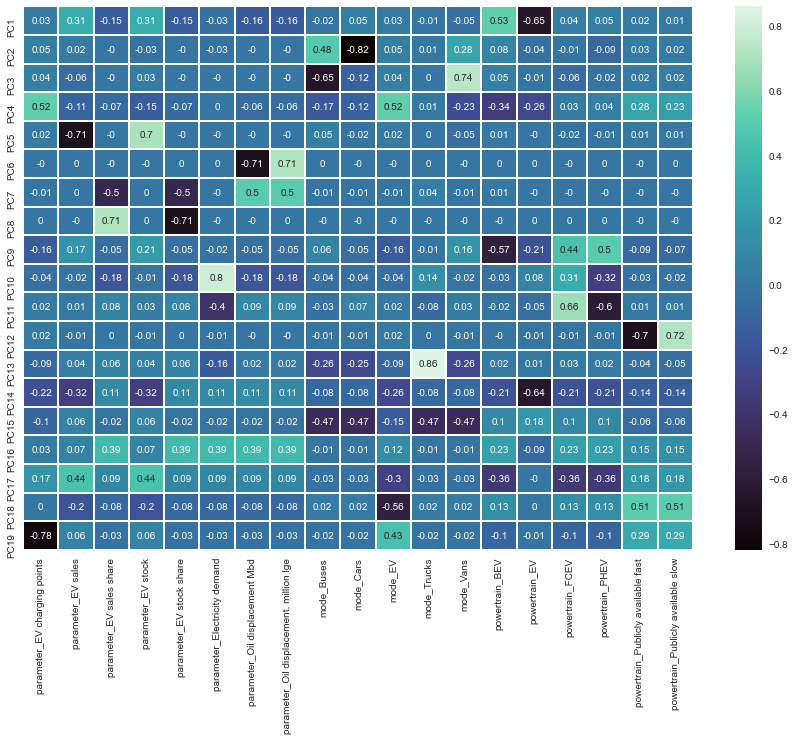

In [25]:
#Correlation matrix plot for loadings 

plt.figure(figsize=(15,10))
ax = sns.heatmap(pc, annot=True, cmap='mako',linecolor='white',linewidths=0.1)
plt.show()

Insights:
    
    From the above covarience matrix:
        PC1 has powertrain_EV,powertrain_BEV,parameter_EVSales and parameter_EVSalesShare with the heighest weights which inturn covering 54% of the data.
        PC2 has mode_cars, mode_buses and mode_vans with the heighest weights which is covering 17% of the remaining data.
        PC3 has mode_vans and mode_buses with the heighest weights which is covering 11% of remaining data.
        PC4 has parameter_EV_ChargingPoints, mode_EV and powetrain_BEV; PC5 has parameter_EVsales and parameter_EVStock; PC6 has parameter_OilDisplacement with the heighest weights.
        
        The components PC1 through PC6 covers 78% of the crucial data.

In [26]:
pca.explained_variance_ratio_

array([2.54516839e-01, 1.70201210e-01, 1.11413128e-01, 8.86300657e-02,
       8.41409202e-02, 6.66143199e-02, 6.56468066e-02, 6.45326224e-02,
       3.47956302e-02, 1.96455869e-02, 1.89972316e-02, 1.34366234e-02,
       7.42901667e-03, 3.10160622e-32, 1.99563058e-32, 8.22801426e-33,
       1.00708222e-33, 3.76062123e-34, 2.75807029e-34])

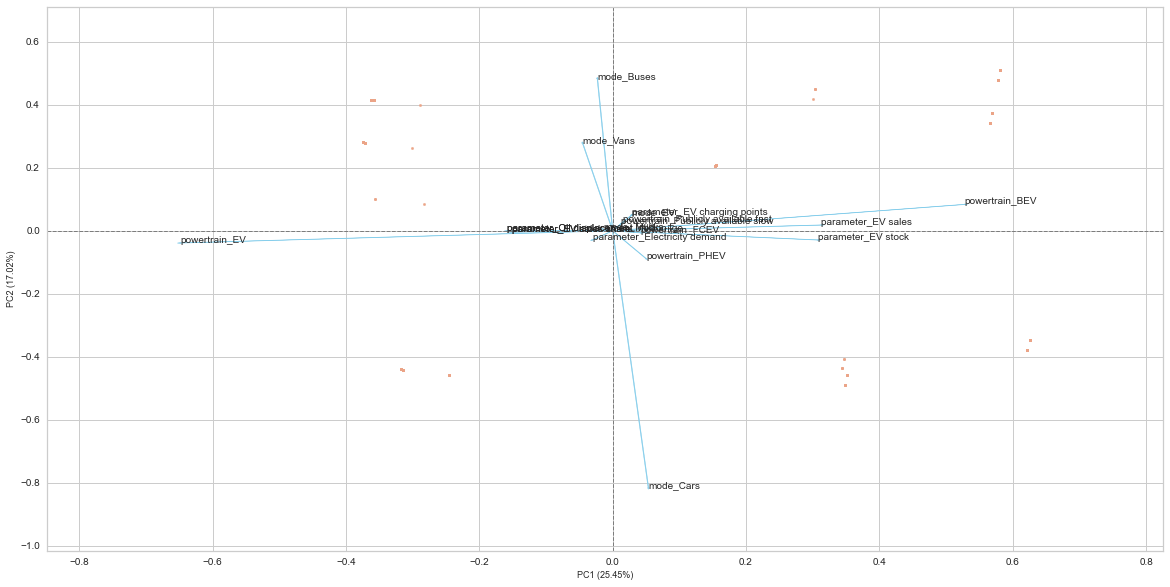

In [27]:
# 2D biplot for PC1 and PC2

cluster.biplot(cscore= data_pca, loadings= pca.components_, labels=df_encoded.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(20,10))

Insight:
    
    From the above cluster plot it is observed that the features powertrain_EV, powertrain_BEV, mode_cars, mode_buses has the highest importance and largest variance. 

### Second, we need to decide how many features we’d like to keep based on the cumulative variance plot.

#### Plotting Cumulative Explained variance of Components


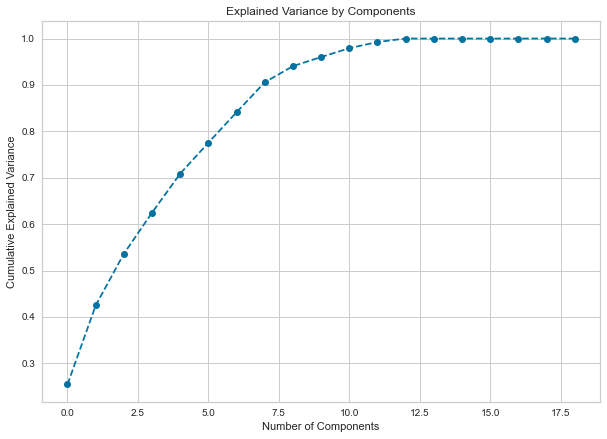

In [28]:
plt.figure(figsize=(10,7))
plt.plot(range(0,19), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')
plt.show()

Insights:
    
    The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). 
    A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 6 components.

#### As a third step, we perform PCA with the chosen number of components.

In [29]:
# We choose 6 components
pca = PCA(n_components=6)

# Fit the data with selected number of components
pca.fit(df_encoded)

# Transforming the data to the principal component space 
scores_pca = pca.transform(df_encoded)

In [30]:
pd.DataFrame(scores_pca)

,0,1,2,3,4,5
0,-0.647358,0.423777,0.786291,-0.155544,-0.043884,-2.313166e-14
1,-0.647358,0.423777,0.786291,-0.155544,-0.043884,7.871313e-15
2,0.993061,0.568518,0.790250,-0.271742,-0.740787,5.212561e-16
3,0.987559,0.521078,0.882280,-0.310003,0.668354,-6.161104e-17
4,-0.654189,0.426815,0.788792,-0.148228,-0.043112,-7.071068e-01
...,...,...,...,...,...,...
223,0.270026,0.315399,0.164735,1.714337,0.056966,-5.240841e-16
224,0.267703,0.311236,0.161269,1.667466,0.055311,4.454403e-16
225,-0.623405,0.154184,0.056335,0.084688,0.007268,-7.071068e-01
226,-0.623405,0.154184,0.056335,0.084688,0.007268,7.071068e-01


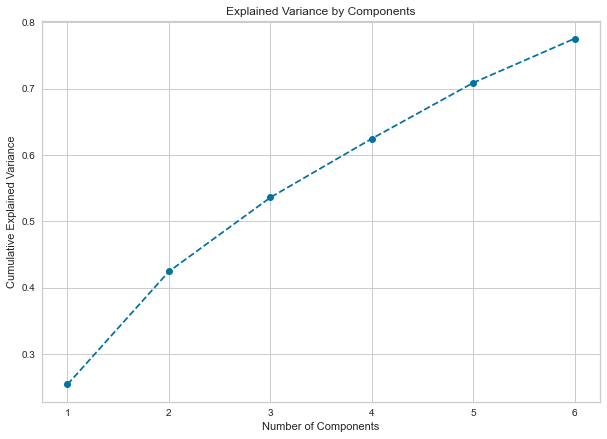

In [31]:
plt.figure(figsize=(10,7))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Clustering

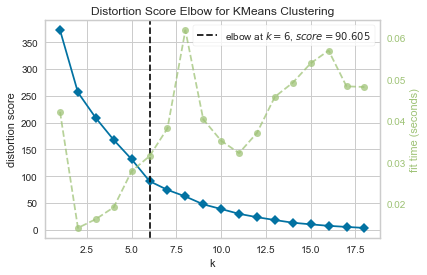

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(1,19)).fit(scores_pca)
visualizer.show()

In [33]:
#using K-means clustering we are going to segment the 80% of the crucial data from PC1-PC6
# generally number of clusters taken in k-menas clustring is 4

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(scores_pca)
#df_encoded['Segment_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[5 5 0 3 5 5 5 5 3 0 5 5 5 5 0 3 5 5 5 5 3 0 5 5 5 5 0 3 5 5 5 5 3 0 5 5 5
 5 0 3 5 5 5 5 3 0 5 5 5 3 0 2 2 2 2 2 2 2 2 0 3 3 0 2 2 2 2 2 2 2 2 0 3 3
 0 2 2 2 2 2 2 2 2 0 3 3 0 2 2 2 2 2 2 2 2 0 3 3 0 2 2 2 2 2 2 2 0 2 0 3 3
 2 2 3 3 0 2 0 2 2 2 2 2 2 0 0 3 2 0 3 3 2 2 3 3 0 2 3 0 0 2 2 2 2 2 2 0 3
 2 0 3 3 2 1 1 0 3 1 1 1 1 3 0 1 1 1 1 0 3 1 1 1 1 3 0 1 1 1 1 0 3 1 1 1 1
 3 0 0 1 1 1 1 0 3 1 1 1 1 3 0 0 1 1 1 1 0 3 0 3 1 1 1 4 4 4 4 4 4 4 4 4 4
 4 4 4 5 5 5]
90.60482997559261
3
[[ 9.32465969e-01  3.63119975e-02 -7.93692969e-02 -1.13686775e-01
  -7.01549876e-01  2.59525949e-16]
 [-6.25279260e-01  6.29182053e-01 -6.02026969e-01 -9.90540849e-02
   5.93572337e-02  6.72043838e-17]
 [-5.41929325e-01 -6.70449090e-01 -7.24387054e-02 -4.53104509e-02
  -1.54185618e-02 -3.97660865e-16]
 [ 9.38962733e-01 -5.97479886e-02  4.17826553e-02 -1.57253835e-01
   7.04826180e-01 -2.49509947e-16]
 [ 2.68953682e-01  3.13477558e-01  1.63135297e-01  1.69270412e+00
   5.62019909e-02 -7.66112681e-17]
 [-6.414719

In [34]:
df_final= pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_final.columns.values[-6:]=['Comp1','Comp2','Comp3','Comp4','Comp5','Comp6']
df_final['Segments Kmeans PCA']=kmeans.labels_

In [36]:
df_final['Segments Kmeans PCA'].unique()

array([5, 0, 3, 2, 1, 4], dtype=int32)

In [37]:
df_final['Segment']=df_final['Segments Kmeans PCA'].map({0:'First',1:'Second',2:'Third',3:'Fourth',4:'Fifth',5:'Sixth'})

In [38]:
df_final.head()

,parameter,mode,powertrain,year,unit,value,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Segments Kmeans PCA,Segment
0,EV sales share,Vans,EV,2016,percent,0.056000,-0.647358,0.423777,0.786291,-0.155544,-0.043884,-2.313166e-14,5,Sixth
1,EV stock share,Vans,EV,2016,percent,0.003200,-0.647358,0.423777,0.786291,-0.155544,-0.043884,7.871313e-15,5,Sixth
2,EV sales,Vans,BEV,2016,Vehicles,180.000000,0.993061,0.568518,0.790250,-0.271742,-0.740787,5.212561e-16,0,First
3,EV stock,Vans,BEV,2016,Vehicles,180.000000,0.987559,0.521078,0.882280,-0.310003,0.668354,-6.161104e-17,3,Fourth
4,Oil displacement Mbd,Vans,EV,2016,Milion barrels per day,0.000009,-0.654189,0.426815,0.788792,-0.148228,-0.043112,-7.071068e-01,5,Sixth


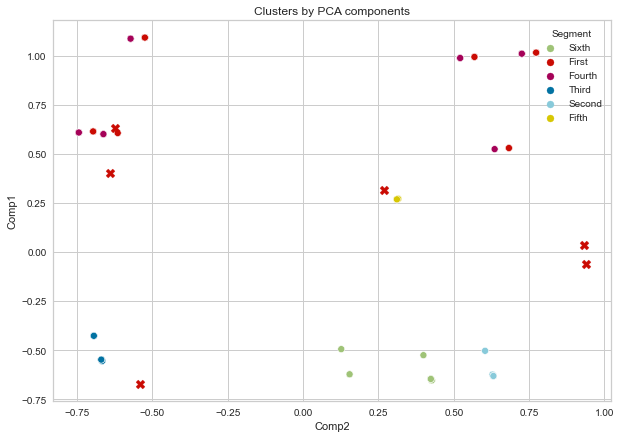

In [40]:
#Plot data by PCA components, First Component on y-axis and second on x-axis
y_axis = df_final['Comp1']
x_axis = df_final['Comp2']
plt.figure(figsize=(10,7))
sns.scatterplot(x_axis, y_axis,hue=df_final['Segment'],palette=['g','r','m','b','c','y'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.title('Clusters by PCA components')
plt.show()

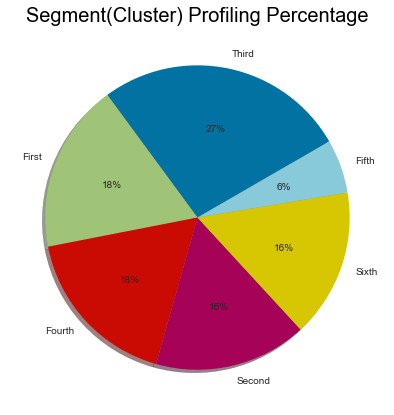

In [41]:
plt.figure(figsize=(12,7))
plt.pie(df_final['Segment'].value_counts(), labels= df_final['Segment'].value_counts().index, 
         autopct='%.0f%%',  shadow = True, startangle=30)
plt.title('Segment(Cluster) Profiling Percentage',fontsize=20, color = 'Black')
plt.show()

Insights:
    
    Segment 0: First segments has 18% data.
    Segment 1: Second segments has 16% data.
    Segment 2: Third segments has 27% data.
    Segment 3: Fourth segments has 18% data.
    Segment 4: Fifth segments has 6% data.
    Segment 5: Sixth segments has 16% data.
        
    Segment 2 has the highest preference then segment 0,3.

In [61]:
columns = df_final.columns[0:4]
columns

Index(['parameter', 'mode', 'powertrain', 'year'], dtype='object')

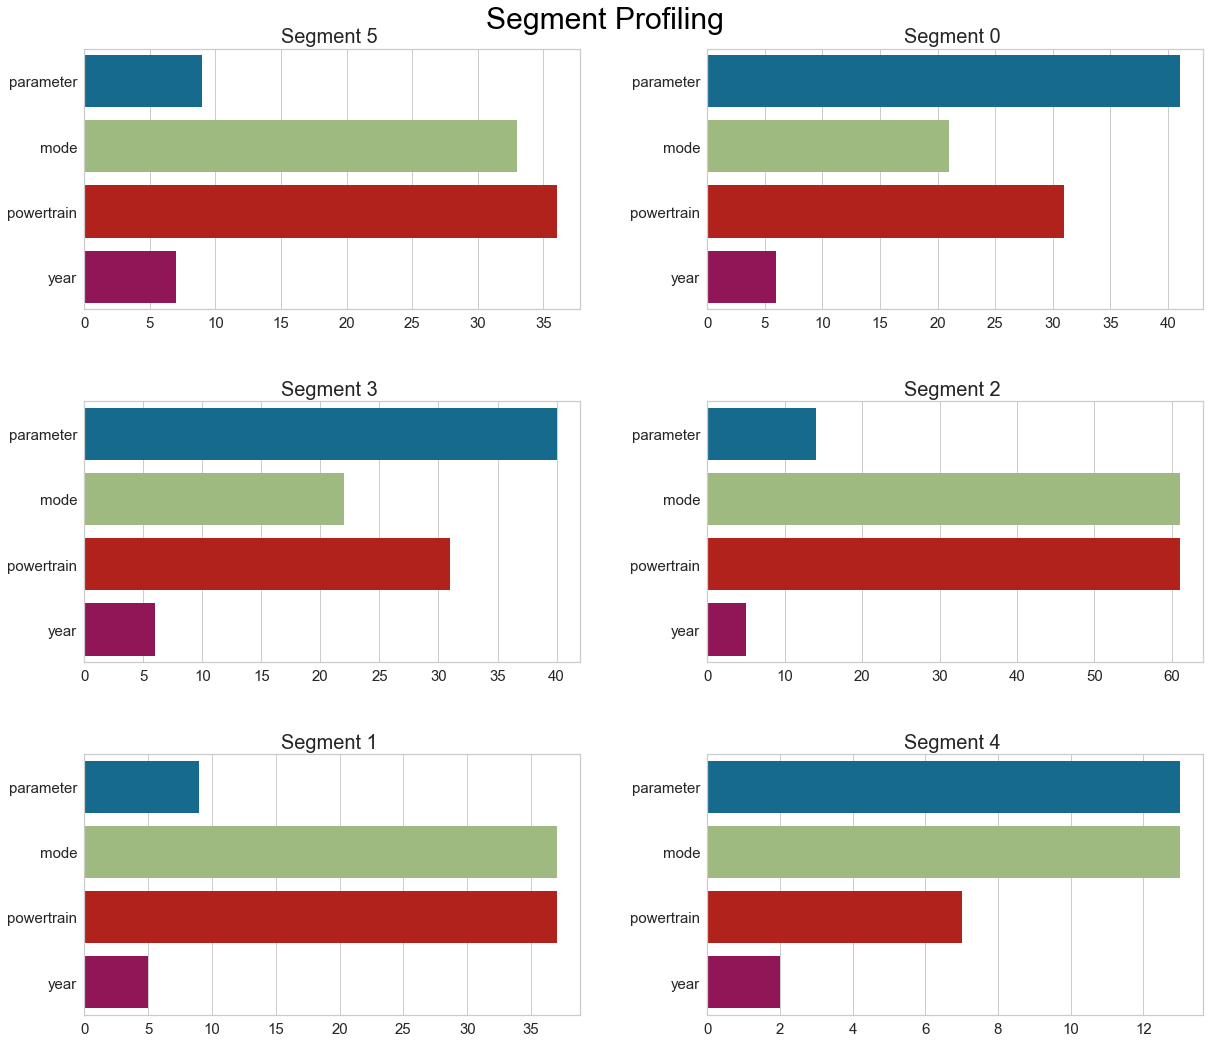

In [62]:

clusters={}
fig = plt.figure(figsize=(18,20))

for i,cluster in enumerate(df_final['Segments Kmeans PCA'].unique()):
    #print(cluster)
    clust_feat_val=[]
    
    plt.subplot(int(len(df_final['Segment'].unique())/2 +1), 2, i+1)
    
    for col in list(columns):
    
        clust_feat_val.append(df_final[df_final['Segments Kmeans PCA']==cluster][col].value_counts().values[0])
    
    clusters[f'cluster_feature_{cluster}_count']=clust_feat_val
    
    sns.barplot(y=list(columns), x=clusters[f'cluster_feature_{cluster}_count'])
    plt.xticks(fontsize='15')
    plt.yticks(fontsize='15')
    plt.title(f'Segment {cluster} ', fontsize='20')
fig.tight_layout(pad=5.0)    
fig.suptitle("Segment Profiling", fontsize= 30, color = 'black')
plt.show()

Insights:
    
    Segment 1 will be the highly preferred segment for the startup to enter into the Indian Market with cars and trucks as the type of Evs to be launced.

In [43]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()

In [63]:
mode_cluster = pd.crosstab(index = df_final['Segment'], columns = df_final['mode'])

In [64]:
parameter_cluster = pd.crosstab(index = df_final['Segment'], columns = df_final['parameter'])

In [65]:
powertrain_cluster = pd.crosstab(index = df_final['Segment'], columns = df_final['powertrain'])

In [66]:
color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500']
#color_list=['b','g','r','c','m','y','k']

In [67]:
mode_cluster

mode,Buses,Cars,EV,Trucks,Vans
Segment,,,,,
Fifth,0,0,13,0,0
First,12,21,0,0,8
Fourth,10,22,0,0,8
Second,37,0,0,0,0
Sixth,0,0,0,3,33
Third,0,61,0,0,0


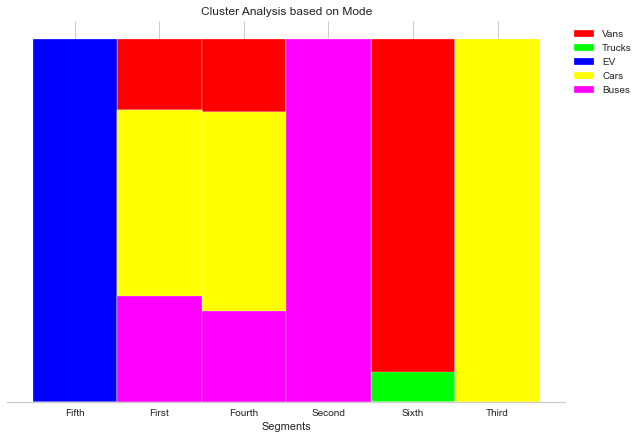

In [76]:
mosaicplot(mode_cluster, color_list[:5], figsize=(10,7), barwidth = 1,title='Cluster Analysis based on Mode')

In [69]:
parameter_cluster

parameter,EV charging points,EV sales,EV sales share,EV stock,EV stock share,Electricity demand,Oil displacement Mbd,"Oil displacement, million lge"
Segment,,,,,,,,
Fifth,13,0,0,0,0,0,0,0
First,0,41,0,0,0,0,0,0
Fourth,0,0,0,40,0,0,0,0
Second,0,0,9,0,9,1,9,9
Sixth,0,0,8,0,8,2,9,9
Third,0,0,14,0,14,5,14,14


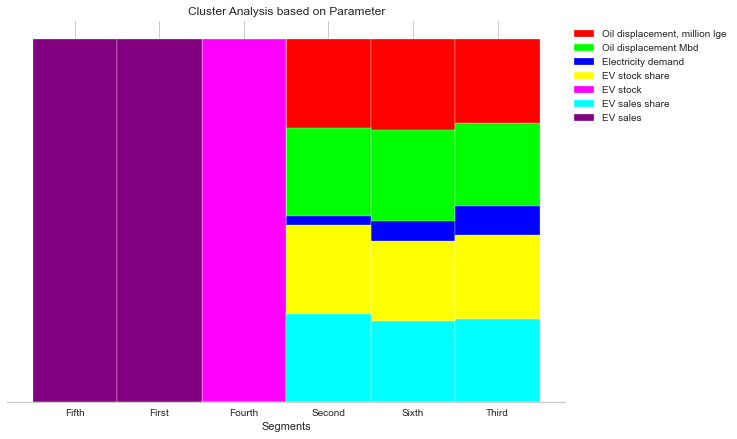

In [78]:
mosaicplot(parameter_cluster, color_list[:7], figsize=(10,7), barwidth = 1,title='Cluster Analysis based on Parameter')

In [71]:
powertrain_cluster

powertrain,BEV,EV,FCEV,PHEV,Publicly available fast,Publicly available slow
Segment,,,,,,
Fifth,0,0,0,0,7,6
First,31,0,5,5,0,0
Fourth,31,0,4,5,0,0
Second,0,37,0,0,0,0
Sixth,0,36,0,0,0,0
Third,0,61,0,0,0,0


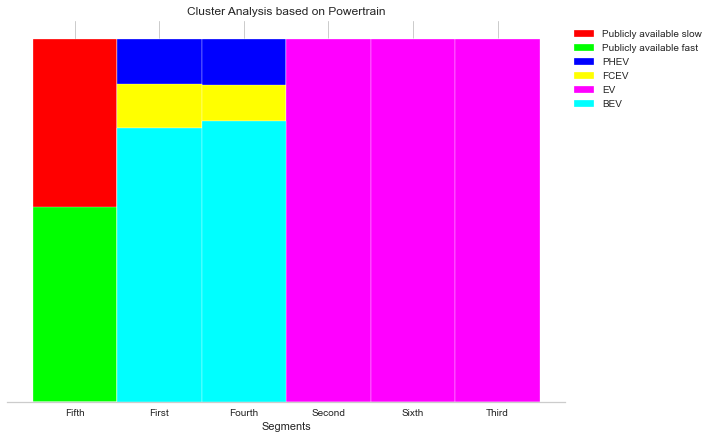

In [80]:
mosaicplot(powertrain_cluster, color_list[:7], figsize=(10,7), barwidth = 1, title = 'Cluster Analysis based on Powertrain')

Insights:
    
    Concentrating on Segment 2 which has highest data covered whose cluster analysis reveals that it is dominated by all types of EV cars as the dominating mode.
    The second dominating segments are segment0 and Segment 3 whose cluster analysis reveals that :
    Segment 0, Segment 3  has more BEV vehicles especially cars, buses and vans.


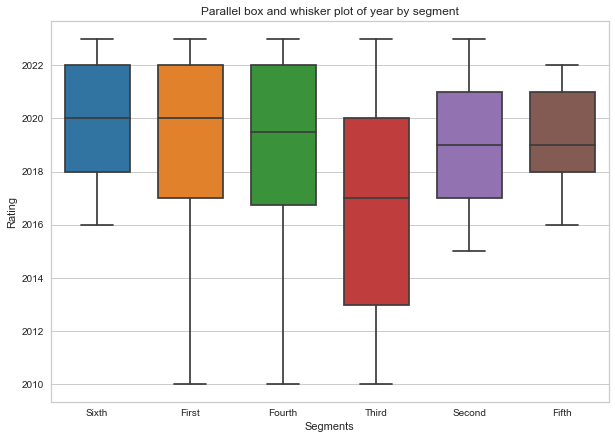

In [74]:
#df_copy['Segment']
plt.figure(figsize = (10,7))
sns.boxplot(x= df_final['Segment'], y = df_final['year'], palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Year")
plt.title("Parallel box and whisker plot of year by segment")
plt.show()

Insights:
    
   From the box plot it is known that Segment 2 has the data spread across 2013-2020 which says about the sales data that year.